In [2]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy

import system.theoretical2pi as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

In [65]:
def cost(parameters, constants):
    # parameters = [offset, duration]
    offset = parameters[0]
    duration = parameters[1]
    # constants = [amplitude]
    amplitude = constants[0]
    tlist = np.linspace(0, duration, int(duration*10))
    pulse_gen.setup(amplitude=amplitude, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=0.2, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    fidelity = expectation_values[1][-1]
    return (1-fidelity)

In [7]:
result1 = scipy.optimize.minimize(cost, [0.2, 25], [2.5*2*np.pi], method="Nelder-Mead", options={"disp":True})

Optimization terminated successfully.
         Current function value: 0.003114
         Iterations: 43
         Function evaluations: 91


In [10]:
result2 = scipy.optimize.minimize(cost, result1.x, [2.6*2*np.pi], method="Nelder-Mead", options={"disp":True})

Optimization terminated successfully.
         Current function value: 0.004569
         Iterations: 38
         Function evaluations: 79


In [71]:
# offs = [result1.x[0], result2.x[0]]
# durs = [result1.x[1], result2.x[1]]
# amps = [2.5*2*np.pi, 2.6*2*np.pi]
# fids = [1 - result1.fun, 1 - result2.fun]
first_run = True
x = [offs[-1], durs[-1]]
for amp in np.arange(6.0*2*np.pi, 10*2*np.pi, 0.1):
    result = scipy.optimize.minimize(cost, x, [amp], method="Nelder-Mead", options={"disp":True})
    offs.append(result.x[0])
    durs.append(result.x[1])
    fids.append( 1 - result.fun)
    amps.append(amp)
    x = [offs[-1], durs[-1]]
    print(amp / (2*np.pi))

Optimization terminated successfully.
         Current function value: 0.479408
         Iterations: 26
         Function evaluations: 54
6.0
Optimization terminated successfully.
         Current function value: 0.502509
         Iterations: 28
         Function evaluations: 55
6.01591549430919
Optimization terminated successfully.
         Current function value: 0.337161
         Iterations: 30
         Function evaluations: 60
6.031830988618379
Optimization terminated successfully.
         Current function value: 0.345468
         Iterations: 26
         Function evaluations: 55
6.047746482927569
Optimization terminated successfully.
         Current function value: 0.355256
         Iterations: 27
         Function evaluations: 57
6.063661977236759
Optimization terminated successfully.
         Current function value: 0.367896
         Iterations: 26
         Function evaluations: 54
6.0795774715459485
Optimization terminated successfully.
         Current function value: 0.38320

capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


KeyboardInterrupt: 

In [6]:
import utils.saver as saver

# saver.save({"amps": amps, "fids": fids, "offs": offs, "durs": durs}, "tukey_best_results")
r = saver.load("tukey_best_results")
amps = r["amps"]
offs = r["offs"]
durs = r["durs"]
fids = r["fids"]

In [13]:
def sort_by_amp(amps, offs, durs, fids):
    new_indexes = np.argsort(amps)
    sorted_amps = np.array(amps)[new_indexes]
    sorted_offs = np.array(offs)[new_indexes]
    sorted_durs = np.array(durs)[new_indexes]
    sorted_fids = np.array(fids)[new_indexes]
    sorted_freqs = (system.first_energy_spacing/3 - sorted_offs)

    return sorted_amps, sorted_offs, sorted_durs, sorted_fids, sorted_freqs

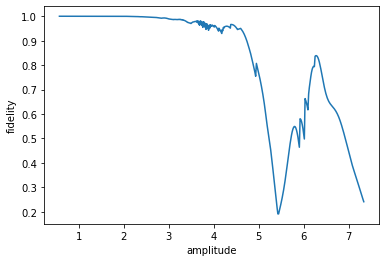

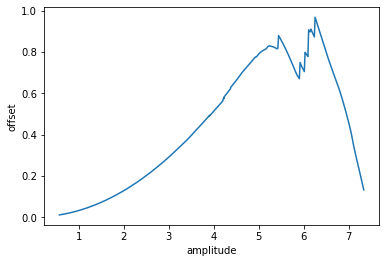

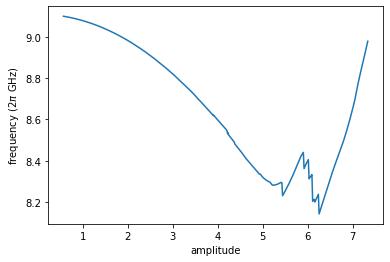

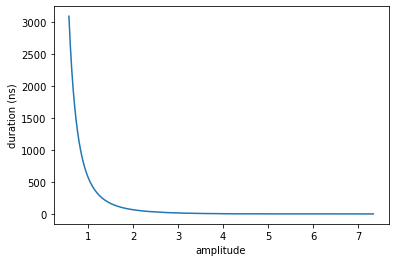

7.33690152197194

In [29]:
skip = 0
sorted_amps, sorted_offs, sorted_durs, sorted_fids, sorted_freqs = sort_by_amp(amps[skip:], offs[skip:], durs[skip:], fids[skip:])

plt.xlabel("amplitude")
plt.ylabel("fidelity")
plt.plot(np.array(sorted_amps) / (2*np.pi), sorted_fids)
plt.show()

plt.xlabel("amplitude")
plt.ylabel("offset")
plt.plot(np.array(sorted_amps) / (2*np.pi), sorted_offs)
plt.show()

plt.xlabel("amplitude")
plt.ylabel("frequency ($2\pi$ GHz)")
plt.plot(np.array(sorted_amps) / (2*np.pi), sorted_freqs)
plt.show()

plt.xlabel("amplitude")
plt.ylabel("duration (ns)")
plt.plot(np.array(sorted_amps) / (2*np.pi), sorted_durs)
plt.show()

sorted_amps[-1] / (2*np.pi)